In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency



In [2]:
dfknn=pd.read_csv('Df_OFF_remp_knn.csv')

C:\Users\miche\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dfknn.head()

,Unnamed: 0,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g,nutrition_grade_fr,main_category_fr,ingrédients,code,quantité
0,0,0.00129,0.000,3.57,3.6,0.000,28.57,64.29,2243.0,D,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",4530,NaN
1,1,0.00129,0.250,17.86,7.1,0.071,17.86,60.71,1941.0,B,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",4559,NaN
2,2,0.00514,0.482,17.86,7.1,0.143,57.14,17.86,2540.0,D,NaN,"Organic hazelnuts, organic cashews, organic wa...",16087,NaN
3,3,0.00422,0.055,14.06,9.4,0.062,18.75,57.81,1833.0,C,NaN,"Org oats, org hemp granola (org oats, evaporat...",16124,NaN
4,4,0.00360,0.633,16.67,6.7,0.133,36.67,36.67,2230.0,D,NaN,"Roasted peanuts (peanuts, peanut or canola oil...",16872,NaN


In [4]:
dfknn.drop('Unnamed: 0',axis=1,inplace=True)

## $\Rightarrow$ <ins> Partie X</ins> Première approche pour l'observation des nutriscores par catégorie d'aliments
<font color='red' size=3> Est-ce que les nutriscores sont autant éparses sur les différentes catégories d'aliments ?
    Y'il a t'il une dépendance entre la catégorie et le nutriscore pour les différents aliments

In [5]:
(dfknn.main_category_fr.value_counts())

Chocolats                                  2169
Aliments et boissons à base de végétaux    1999
Epicerie                                   1989
Conserves                                  1868
Boissons                                   1793
                                           ... 
Acras-de-morue                                1
Succes                                        1
en:Plats-prepares-surgeles                    1
en:Lasagnes-preparees                         1
en:Asian-grocery                              1
Name: main_category_fr, Length: 1904, dtype: int64

On choisit de prendre par défaut 9 catégories différentes afin de s'y retrouver. On prend les catégories qui reviennent le plus.

In [6]:
lst_cat=(dfknn.main_category_fr.value_counts())[(dfknn.main_category_fr.value_counts()>1450)].index.values

In [7]:
lst_cat

array(['Chocolats', 'Aliments et boissons à base de végétaux', 'Epicerie',
       'Conserves', 'Boissons', 'Biscuits', 'Plats préparés', 'Surgelés',
       'Petit-déjeuners'], dtype=object)

In [8]:
df_chi2=dfknn[dfknn['main_category_fr'].isin(lst_cat)][['main_category_fr','nutrition_grade_fr']]

In [9]:
df_chi2

,main_category_fr,nutrition_grade_fr
57,Plats préparés,B
80,Aliments et boissons à base de végétaux,E
220,Plats préparés,D
239,Plats préparés,C
249,Conserves,A
...,...,...
190236,Boissons,E
190237,Boissons,B
190239,Petit-déjeuners,C
190252,Epicerie,D


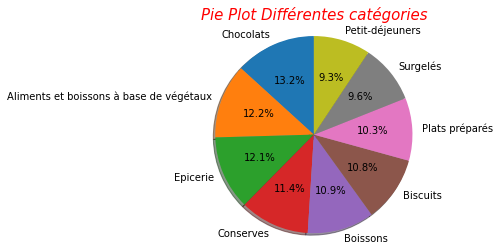

<Figure size 432x288 with 0 Axes>

In [10]:
labels = df_chi2.main_category_fr.value_counts().index.values
sizes = df_chi2.main_category_fr.value_counts().values

fig1, ax1 = plt.subplots()
plt.figure(facecolor=None)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Plot Différentes catégories',fontsize=15,c='red',fontstyle='italic',ha='center')
plt.show()

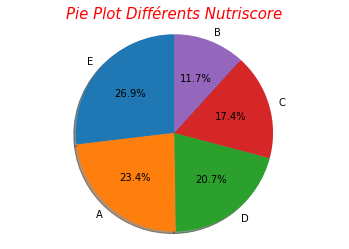

<Figure size 432x288 with 0 Axes>

In [11]:
labels = df_chi2.nutrition_grade_fr.value_counts().index.values
sizes = df_chi2.nutrition_grade_fr.value_counts().values

fig1, ax1 = plt.subplots()
plt.figure(facecolor=None)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Plot Différents Nutriscore',fontsize=15,c='red',fontstyle='italic',ha='center')
plt.show()

In [12]:
X = "nutrition_grade_fr"
Y = "main_category_fr"

cont = df_chi2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

main_category_fr,Aliments et boissons à base de végétaux,Biscuits,Boissons,Chocolats,Conserves,Epicerie,Petit-déjeuners,Plats préparés,Surgelés,Total
nutrition_grade_fr,,,,,,,,,,
A,1039.0,18.0,116.0,NaN,1323.0,81.0,274.0,389.0,584.0,3824
B,234.0,20.0,291.0,NaN,298.0,162.0,112.0,489.0,316.0,1922
C,335.0,122.0,129.0,12.0,156.0,568.0,567.0,561.0,396.0,2846
D,264.0,557.0,321.0,304.0,56.0,883.0,505.0,231.0,261.0,3382
E,127.0,1048.0,936.0,1853.0,35.0,295.0,68.0,17.0,23.0,4402
Total,1999.0,1765.0,1793.0,2169.0,1868.0,1989.0,1526.0,1687.0,1580.0,16376


In [13]:
cont.iloc[:-1,:-1].fillna(0)

main_category_fr,Aliments et boissons à base de végétaux,Biscuits,Boissons,Chocolats,Conserves,Epicerie,Petit-déjeuners,Plats préparés,Surgelés
nutrition_grade_fr,,,,,,,,,
A,1039.0,18.0,116.0,0.0,1323.0,81.0,274.0,389.0,584.0
B,234.0,20.0,291.0,0.0,298.0,162.0,112.0,489.0,316.0
C,335.0,122.0,129.0,12.0,156.0,568.0,567.0,561.0,396.0
D,264.0,557.0,321.0,304.0,56.0,883.0,505.0,231.0,261.0
E,127.0,1048.0,936.0,1853.0,35.0,295.0,68.0,17.0,23.0


In [14]:
c, p, dof, expected = chi2_contingency(cont.iloc[:-1,:-1].fillna(0),correction=False) 
print('c vaut',c,'\n avec',dof,'deg de liberté \n et pvalue de',p)

c vaut 13589.422842128755 
 avec 32 deg de liberté 
 et pvalue de 0.0


In [15]:
expec=pd.DataFrame(expected,index=cont.iloc[:-1,:-1].index,columns=cont.iloc[:-1,:-1].columns)

In [16]:
expec

main_category_fr,Aliments et boissons à base de végétaux,Biscuits,Boissons,Chocolats,Conserves,Epicerie,Petit-déjeuners,Plats préparés,Surgelés
nutrition_grade_fr,,,,,,,,,
A,466.791402,412.149487,418.687836,506.488520,436.201270,464.456277,356.340010,393.935515,368.949682
B,234.616390,207.152540,210.438813,254.568759,219.241329,233.442721,179.101856,197.997924,185.439668
C,347.408036,306.740962,311.607108,376.952491,324.641426,345.670127,265.204934,293.185271,274.589643
D,412.836957,364.510870,370.293478,447.945652,385.782609,410.771739,315.152174,348.402174,326.304348
E,537.347215,474.446141,481.972765,583.044577,502.133366,534.659135,410.201026,453.479116,424.716659


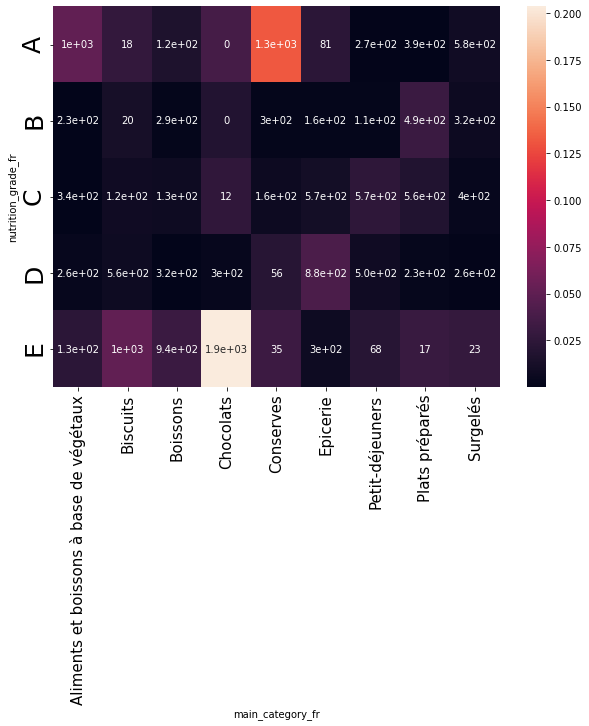

In [17]:

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_chi2)
indep = tx.dot(ty) / n

measure = (cont.fillna(0)-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize=(10,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=25)

sns.heatmap(table.iloc[:-1,:-1],annot=cont.fillna(0).iloc[:-1,:-1])
plt.show()

In [18]:
expec ==indep.iloc[:-1,:-1]

main_category_fr,Aliments et boissons à base de végétaux,Biscuits,Boissons,Chocolats,Conserves,Epicerie,Petit-déjeuners,Plats préparés,Surgelés
nutrition_grade_fr,,,,,,,,,
A,True,True,True,True,True,True,True,True,True
B,True,True,True,True,True,True,True,True,True
C,True,True,True,True,True,True,True,True,True
D,True,True,True,True,True,True,True,True,True
E,True,True,True,True,True,True,True,True,True


La catégorie A de la variable nutriscore et ma catégories chocolats et conservessemble contribuer à une éventuelle corrélation même si on peut pas conclure: on fait un test du chi2 mgl

In [19]:
xi_n

13589.422842128755

<font color='red'>On fait un test du khi2, on sait ici que nous disposons de (5-1)x(10-1)=36 degrées de liberté et que notre khi2 vaut : 13589 très grand. On fait une recherche de la table 


    
    
    On est sur qu'il y a une dépendance entre le nutriscore et la catégorie

## Etude par rapport à des valeurs journalières recommandées. 

On peut retrouver des informations sur ce site permettant de faire un tableau des valeurs journalières: 

    - https://www.nutripro.nestle.fr/article/apport-nutritionnel-conseille-pour-adulte
    - https://www.nshealth.ca/sites/nshealth.ca/files/patientinformation/ff1106.pdf
 

In [20]:
dfknn.isna().mean()

iron_100g             0.000000
sodium_100g           0.000000
proteins_100g         0.000000
fiber_100g            0.000000
calcium_100g          0.000000
fat_100g              0.000000
carbohydrates_100g    0.000000
energy_100g           0.000000
nutrition_grade_fr    0.000000
main_category_fr      0.713161
ingrédients           0.028146
code                  0.000000
quantité              0.698765
dtype: float64

In [22]:
columns=dfknn.columns
columns

Index(['iron_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g',
       'calcium_100g', 'fat_100g', 'carbohydrates_100g', 'energy_100g',
       'nutrition_grade_fr', 'main_category_fr', 'ingrédients', 'code',
       'quantité'],
      dtype='object')

In [24]:
data_quant=columns[:-5].values
data_quant

array(['iron_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g',
       'calcium_100g', 'fat_100g', 'carbohydrates_100g', 'energy_100g'],
      dtype=object)

## $\Rightarrow$ <ins> Partie X</ins> Sélection des plats préparéset étude

In [25]:
df_platprep=dfknn[(dfknn.main_category_fr=='Plats préparés')]

In [26]:
df_platprep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 57 to 190107
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iron_100g           1687 non-null   float64
 1   sodium_100g         1687 non-null   float64
 2   proteins_100g       1687 non-null   float64
 3   fiber_100g          1687 non-null   float64
 4   calcium_100g        1687 non-null   float64
 5   fat_100g            1687 non-null   float64
 6   carbohydrates_100g  1687 non-null   float64
 7   energy_100g         1687 non-null   float64
 8   nutrition_grade_fr  1687 non-null   object 
 9   main_category_fr    1687 non-null   object 
 10  ingrédients         1595 non-null   object 
 11  code                1687 non-null   object 
 12  quantité            1670 non-null   object 
dtypes: float64(8), object(5)
memory usage: 184.5+ KB


In [27]:
df_platprep=df_platprep[df_platprep['quantité'].notna()]

In [28]:
df_platprep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 57 to 190107
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iron_100g           1670 non-null   float64
 1   sodium_100g         1670 non-null   float64
 2   proteins_100g       1670 non-null   float64
 3   fiber_100g          1670 non-null   float64
 4   calcium_100g        1670 non-null   float64
 5   fat_100g            1670 non-null   float64
 6   carbohydrates_100g  1670 non-null   float64
 7   energy_100g         1670 non-null   float64
 8   nutrition_grade_fr  1670 non-null   object 
 9   main_category_fr    1670 non-null   object 
 10  ingrédients         1583 non-null   object 
 11  code                1670 non-null   object 
 12  quantité            1670 non-null   object 
dtypes: float64(8), object(5)
memory usage: 182.7+ KB


In [29]:
def conversion_g(l):
    lst=['kg','g','grammes','gr','g.']
    if not(l[0].isdigit()):
        return np.nan
    elif l[1].isalpha():
        if l[1].lower() in lst:
            if l[1].lower() =='kg':
                return 1000*int(l[0])
            else:
                return int(l[0])
        else: return np.nan
    else: return np.nan

def keep_quant(s):
    ls=s.split(' ')
    if len(ls)>2:
        return np.nan
    elif len(ls)==2:
        return conversion_g(ls)
    elif len(ls)==1:
        ls= [s[:-1],s[-1]]
        return conversion_g(ls)
    else: return np.nan

In [30]:
quant_en_grammes= df_platprep.quantité.apply(keep_quant)

In [31]:
quant_en_grammes.notna().value_counts().values


array([1381,  289], dtype=int64)

Text(0, 0.5, '')

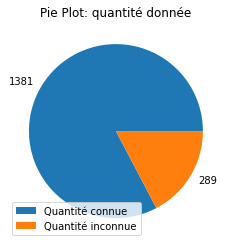

In [32]:
plt.figure(facecolor='white')

quant_en_grammes.notna().value_counts().plot.pie(labels=quant_en_grammes.notna().value_counts().values)
plt.title('Pie Plot: quantité donnée')
plt.legend(loc='lower left',labels=['Quantité connue','Quantité inconnue'])
plt.ylabel('')

In [33]:
df_platprep[quant_en_grammes.notna()].notna().mean()

iron_100g             1.000000
sodium_100g           1.000000
proteins_100g         1.000000
fiber_100g            1.000000
calcium_100g          1.000000
fat_100g              1.000000
carbohydrates_100g    1.000000
energy_100g           1.000000
nutrition_grade_fr    1.000000
main_category_fr      1.000000
ingrédients           0.946416
code                  1.000000
quantité              1.000000
dtype: float64

In [34]:
df_platprep=df_platprep[quant_en_grammes.notna()]
df_platprep['quantité']=quant_en_grammes.dropna()

In [35]:
df_platprep.drop('main_category_fr',axis=1)

,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g,nutrition_grade_fr,ingrédients,code,quantité
239,0.000727,0.298000,8.08,0.505,0.1010,7.58,21.20,761.0,C,"COOKED ELBOW MACARONI (WATER, ENRICHED SEMOLIN...",36559,397.0
7298,0.000155,0.216535,1.00,2.500,0.0475,2.50,5.00,215.0,A,NaN,114356,390.0
9710,0.001540,0.326772,8.00,2.100,0.1140,6.90,29.20,905.0,B,Farine de _blé_ contient _Gluten_ (avec Farin...,161862,505.0
11776,0.001085,0.236220,7.90,2.000,0.0950,8.40,10.40,638.0,B,Bœuf (27%) - _Lait_ demi-écrémé - Tomates (19%...,201766,1000.0
14709,0.002215,0.358000,9.05,3.160,0.1595,7.26,39.40,1120.0,B,"Wheatflour, Water, Vegetarian Mozzarella Chees...",226646,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
189232,0.000000,10.833000,0.00,0.000,0.3330,16.67,16.67,870.0,E,"Salt, Spices, Galangal, Lemongrass, Vegetable ...",8850030116019,50.0
189663,0.000970,0.346457,6.00,6.100,0.0210,8.40,6.50,136.0,A,"Pâtes cuites 46% (eau, amidon de blé modifié, ...",9005545001650,400.0
189664,0.001470,0.287402,6.50,5.200,0.0285,4.30,8.70,459.0,A,"Pâtes cuites 45% (eau, amidon de blé modifié, ...",9005545001674,400.0
189666,0.000280,0.334646,4.70,1.400,0.0295,1.40,17.00,444.0,B,"34% Reis gekocht (Wasser, Reis), Wasser, 12% r...",9005545004200,380.0


In [36]:
lab=df_platprep['nutrition_grade_fr'].value_counts().index+np.array([': ',': ',': ',': ',': '])+df_platprep['nutrition_grade_fr'].value_counts().astype(str).values 


Text(0, 0.5, '')

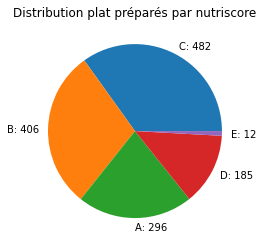

In [37]:
plt.figure(facecolor='white')
df_platprep[['nutrition_grade_fr']].value_counts().plot.pie(labels=lab)
plt.title('Distribution plat préparés par nutriscore')
plt.ylabel('')

Text(0, 0.5, '')

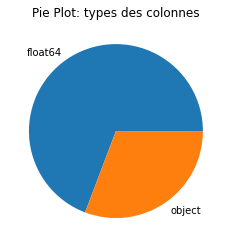

In [38]:
plt.figure(facecolor='white')

labs=pd.Series(df_platprep.dtypes.unique()).apply(lambda x: x.name).values
df_platprep.dtypes.value_counts().plot.pie(labels=labs)
plt.title('Pie Plot: types des colonnes')
plt.ylabel('')

<AxesSubplot:>

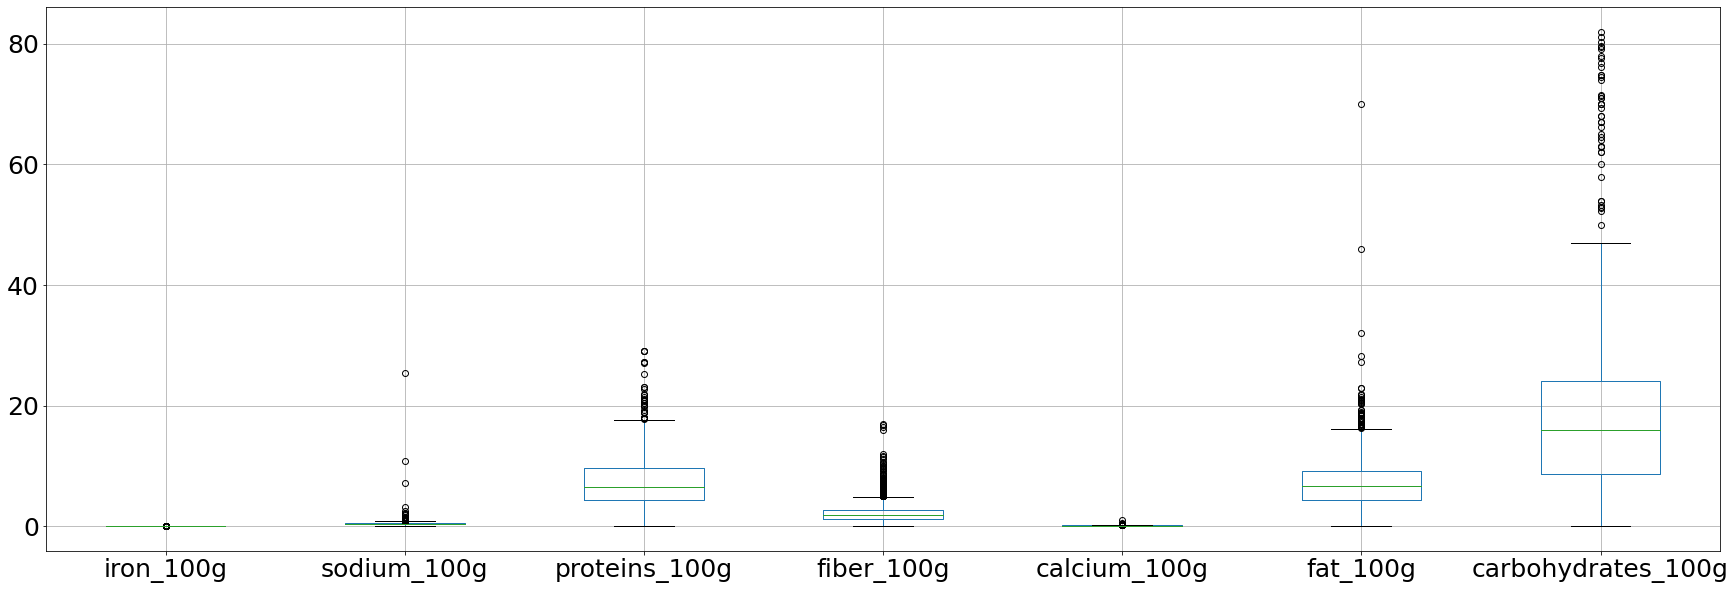

In [39]:
df_platprep[data_quant[:-1]].boxplot(figsize=(30,10),fontsize=25)

(0.0, 5.0)

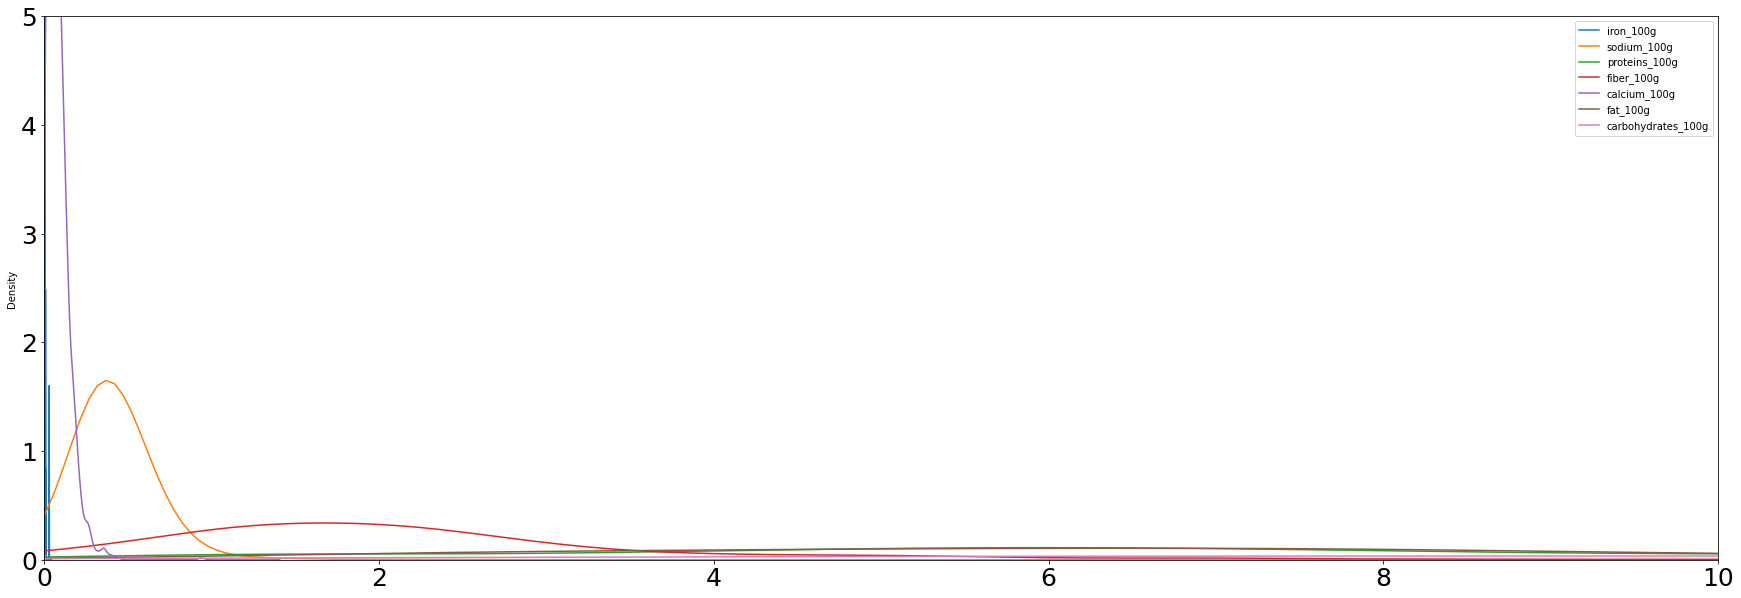

In [40]:
df_platprep[data_quant[:-1]].plot.density(figsize=(30,10),fontsize=25)
plt.xlim(0,10)
plt.ylim(0,5)


In [41]:
df_platprep[df_platprep.columns[:8]].corr()


,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g
iron_100g,1.000000,0.056883,0.230297,0.269108,0.107038,0.048770,0.255698,0.279425
sodium_100g,0.056883,1.000000,0.082136,0.074600,0.061534,0.054723,0.221028,0.206262
proteins_100g,0.230297,0.082136,1.000000,0.178296,0.363771,0.274964,0.178932,0.524711
fiber_100g,0.269108,0.074600,0.178296,1.000000,-0.010152,-0.058907,0.197742,0.190692
calcium_100g,0.107038,0.061534,0.363771,-0.010152,1.000000,0.242394,0.151835,0.346147
fat_100g,0.048770,0.054723,0.274964,-0.058907,0.242394,1.000000,-0.068210,0.495317
carbohydrates_100g,0.255698,0.221028,0.178932,0.197742,0.151835,-0.068210,1.000000,0.723892
energy_100g,0.279425,0.206262,0.524711,0.190692,0.346147,0.495317,0.723892,1.000000


In [42]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df_platprep[data_quant]),columns = df_platprep[data_quant].columns)

<AxesSubplot:>

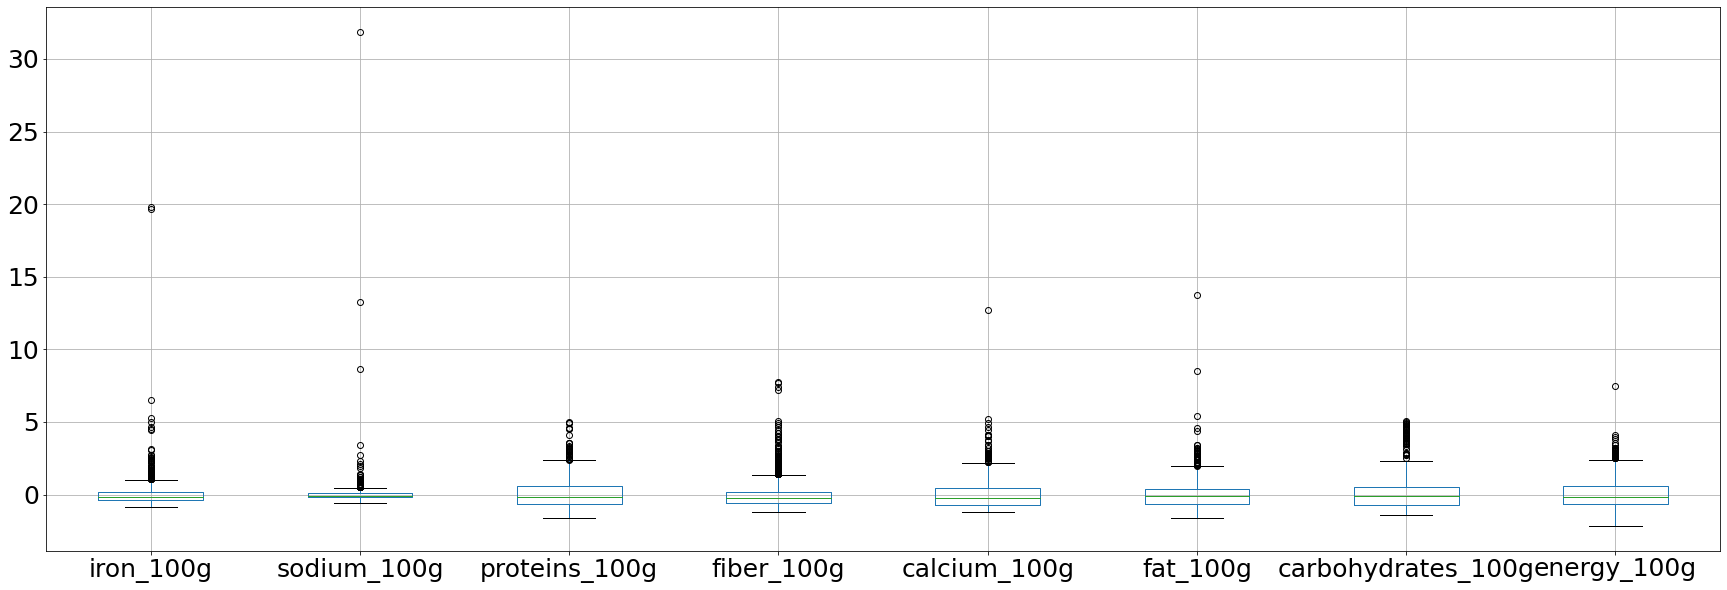

In [43]:
df_scaled.boxplot(figsize=(30,10),fontsize=25)

<AxesSubplot:ylabel='Density'>

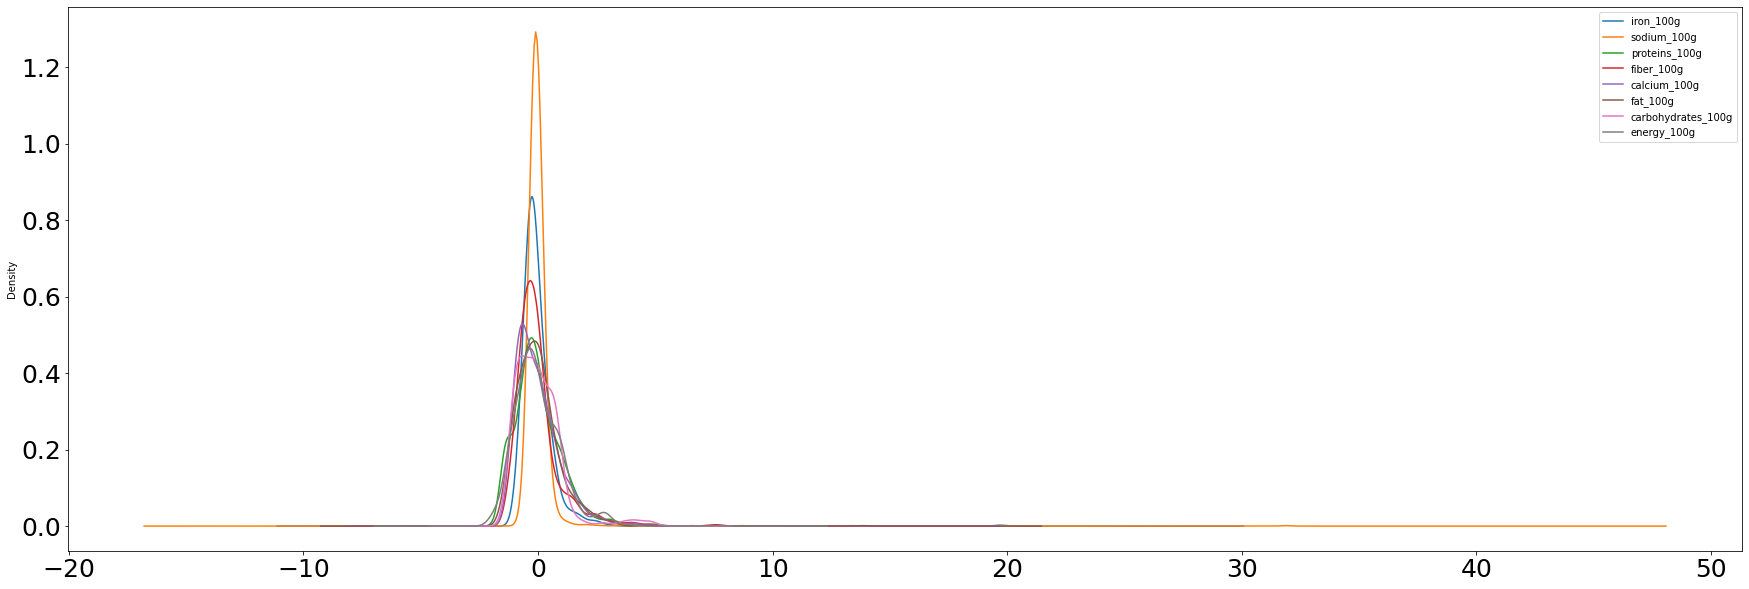

In [44]:
df_scaled.plot.density(figsize=(30,10),fontsize=25)

## <font color ='gray'> ACP sur la base des données des plats préparés:

In [45]:
from sklearn import decomposition
from sklearn import preprocessing 


In [46]:
df_platprep.columns

Index(['iron_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g',
       'calcium_100g', 'fat_100g', 'carbohydrates_100g', 'energy_100g',
       'nutrition_grade_fr', 'main_category_fr', 'ingrédients', 'code',
       'quantité'],
      dtype='object')

In [47]:
data_pca=df_platprep[['iron_100g','sodium_100g','proteins_100g','fiber_100g','calcium_100g','fat_100g','carbohydrates_100g','energy_100g','quantité']]

In [48]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 239 to 190107
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iron_100g           1381 non-null   float64
 1   sodium_100g         1381 non-null   float64
 2   proteins_100g       1381 non-null   float64
 3   fiber_100g          1381 non-null   float64
 4   calcium_100g        1381 non-null   float64
 5   fat_100g            1381 non-null   float64
 6   carbohydrates_100g  1381 non-null   float64
 7   energy_100g         1381 non-null   float64
 8   quantité            1381 non-null   float64
dtypes: float64(9)
memory usage: 107.9 KB


In [156]:
X=data_pca.values

In [50]:
names=df_platprep['code']
features=['iron_100g','sodium_100g','proteins_100g','fiber_100g','calcium_100g','fat_100g','carbohydrates_100g','energy_100g','quantité']

In [51]:
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X)

In [181]:
X_scaled.shape

(1381, 9)

In [52]:
pca=decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [144]:
X_trans=pca.transform(X_scaled)

In [160]:
X_trans[:,0]

array([ 0.03774936, -2.57124016,  0.79165333, ..., -0.91849304,
       -1.6395069 ,  0.32819989])

In [166]:
dcor=pd.DataFrame(X_trans[:,:2],columns=['F1','F2'],index=data_pca.index)

In [170]:
dcor[data_pca.columns]=data_pca

In [193]:
data_pca.columns

Index(['iron_100g', 'sodium_100g', 'proteins_100g', 'fiber_100g',
       'calcium_100g', 'fat_100g', 'carbohydrates_100g', 'energy_100g',
       'quantité'],
      dtype='object')

In [196]:
dafa=pd.DataFrame(pcs[0].reshape(1,9),columns=data_pca.columns)

In [205]:
dafa=pd.DataFrame(pcs[0],index=data_pca.columns,columns=['F1'])

In [212]:
dafa.sort_values(by='F1',ascending=False).T

,energy_100g,proteins_100g,carbohydrates_100g,calcium_100g,iron_100g,fat_100g,fiber_100g,sodium_100g,quantité
F1,0.551659,0.411825,0.399506,0.306184,0.280065,0.270847,0.209416,0.184145,-0.207748


<AxesSubplot:>

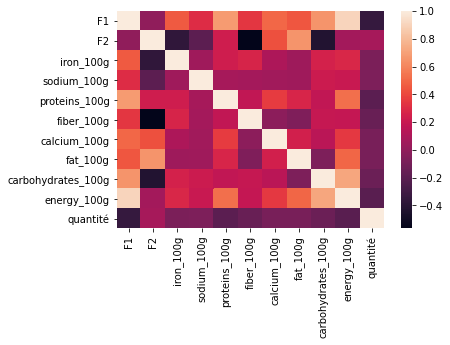

In [173]:
sns.heatmap(dcor.corr())

In [159]:
X[:,0]

array([0.000727, 0.000155, 0.00154 , ..., 0.00147 , 0.00028 , 0.000835])

In [53]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.30104071, 0.45083948, 0.56676457, 0.67216297, 0.76486056,
       0.8524434 , 0.92954593, 0.99320319, 1.        ])

<BarContainer object of 9 artists>

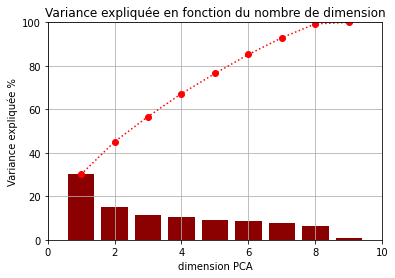

In [54]:
plt.plot(np.arange(1,len(cumsum)+1),cumsum*100,'o:',color='red')
plt.xlim(0,10)
plt.ylim(0,100)
plt.grid()
plt.xlabel('dimension PCA')
plt.ylabel('Variance expliquée %')
plt.title('Variance expliquée en fonction du nombre de dimension')
plt.bar(np.arange(1,len(cumsum)+1),pca.explained_variance_ratio_*100,color='darkred')

In [55]:

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

In [56]:
pcs=pca.components_

In [149]:
pcs.shape

(9, 9)

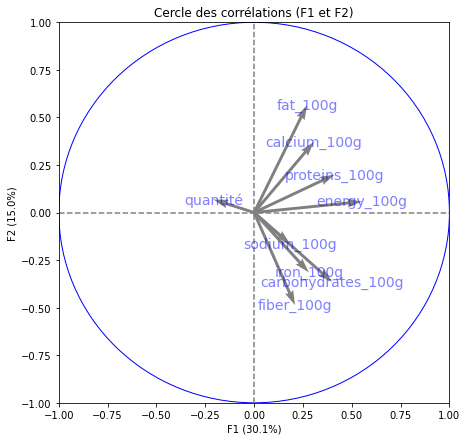

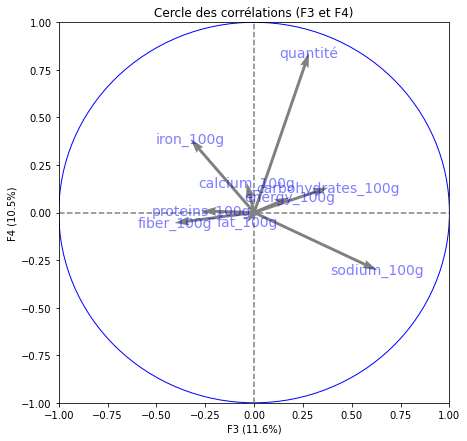

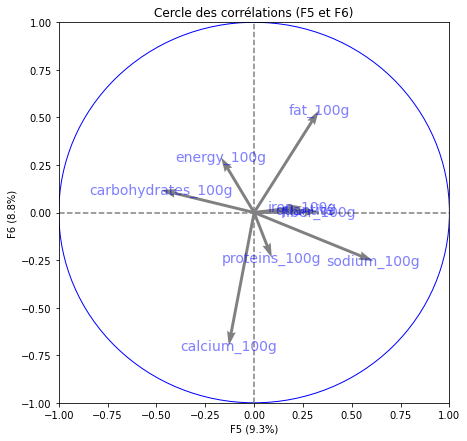

In [57]:
display_circles(pcs,len(cumsum),pca,[(0,1),(2,3),(4,5)], labels = features)

In [58]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


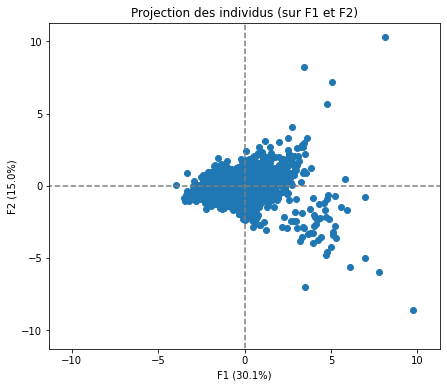

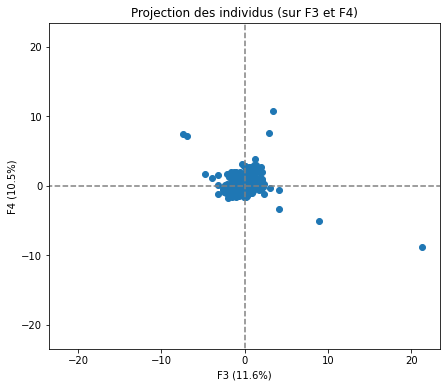

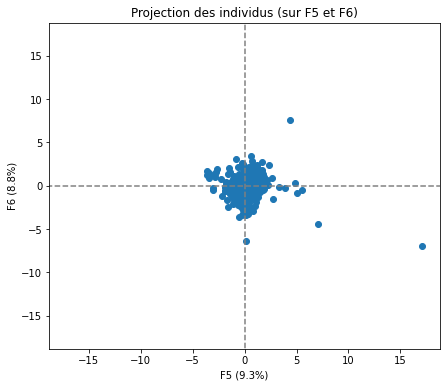

In [59]:
X_proj=pca.transform(X_scaled)
display_factorial_planes(X_proj,len(cumsum),pca, [(0,1),(2,3),(4,5)])


On voit rien mais on peut essayé de faire un Kmeans, Faire des clusters genre 50 clusters et observer après ou même 10 jsp mais on va utiliser la technique du coude

In [60]:
from sklearn.cluster import KMeans
import time

In [61]:
X.shape

(1381, 9)

In [62]:
start_time=time.time()
inertia=[]
for k in range(2,100):
    kmeans=KMeans(n_clusters=k,random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
end_time=time.time() 
print("--- %s seconds ---" % (end_time - start_time),'\n Soit un total de --- %s minutes ---' % ((end_time - start_time)/60) )


--- 32.582419872283936 seconds --- 
 Soit un total de --- 0.5430403312047323 minutes ---


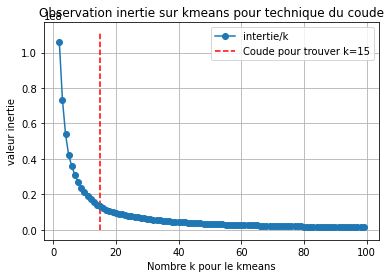

In [63]:
fig,ax=plt.subplots()
ax.plot(range(2,100),inertia,'o-',label='intertie/k')
plt.grid()
ax.vlines(15,0,ax.get_ybound()[1], linestyles='dashed', colors='red',label='Coude pour trouver k=15')

ax.set_xlabel('Nombre k pour le kmeans')
ax.set_ylabel('valeur inertie') 
ax.set_title('Observation inertie sur kmeans pour technique du coude')
plt.legend()
plt.show()

In [64]:
k15means=KMeans(n_clusters=15,random_state=0).fit(X)

In [146]:
k15means_t=KMeans(n_clusters=15).fit(X_trans)

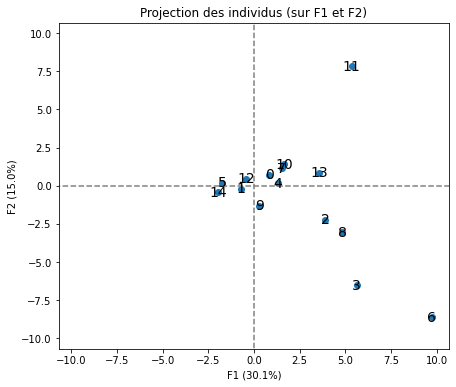

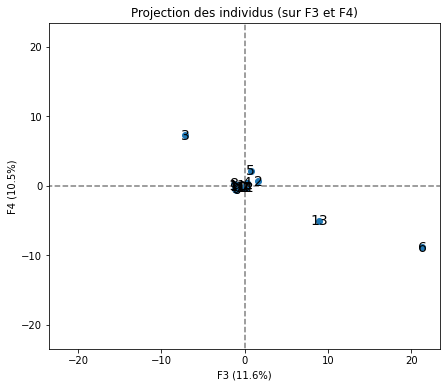

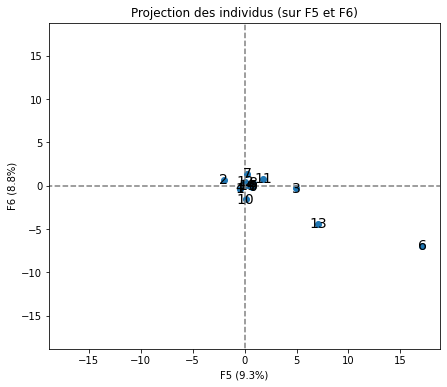

In [147]:
display_factorial_planes(k15means_t.cluster_centers_,len(cumsum),pca, [(0,1),(2,3),(4,5)], labels = np.arange(15))

In [65]:
s_lab=pd.Series(k15means.labels_)

In [66]:
s_lab.unique()

array([ 8, 12,  0,  2, 10, 11,  3,  4,  6,  1, 14,  5, 13,  7,  9])

In [67]:
k15means.predict(k15means.cluster_centers_)==np.arange(15)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [68]:
X_km_scaled=std_scale.transform(k15means.cluster_centers_)

In [128]:
df_clust_center=pd.DataFrame(k15means.cluster_centers_,columns=data_pca.columns)


In [142]:
df_clust_center.iloc[:,-2]

0      991.742187
1      420.633333
2      571.267857
3     1562.882353
4      708.840000
5      253.864865
6      912.504357
7      451.000000
8      744.839048
9     2975.000000
10    1169.375000
11     568.701230
12     254.942623
13     966.916667
14     419.523256
Name: energy_100g, dtype: float64

In [134]:
pd.DataFrame(pca.components_).corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.103280,-0.071350,0.168209,0.063560,-0.119084,0.052755,-0.219811,-0.127271
1,-0.103280,1.000000,-0.062659,0.147719,0.055818,-0.104578,0.046329,-0.193036,-0.111768
2,-0.071350,-0.062659,1.000000,0.102051,0.038562,-0.072247,0.032006,-0.133357,-0.077214
3,0.168209,0.147719,0.102051,1.000000,-0.090909,0.170323,-0.075454,0.314391,0.182033
4,0.063560,0.055818,0.038562,-0.090909,1.000000,0.064359,-0.028512,0.118798,0.068784
5,-0.119084,-0.104578,-0.072247,0.170323,0.064359,1.000000,0.053418,-0.222574,-0.128870
6,0.052755,0.046329,0.032006,-0.075454,-0.028512,0.053418,1.000000,0.098602,0.057091
7,-0.219811,-0.193036,-0.133357,0.314391,0.118798,-0.222574,0.098602,1.000000,-0.237876
8,-0.127271,-0.111768,-0.077214,0.182033,0.068784,-0.128870,0.057091,-0.237876,1.000000


In [136]:
pca.n_components_

9

In [69]:
X_km_scaled.shape

(15, 9)

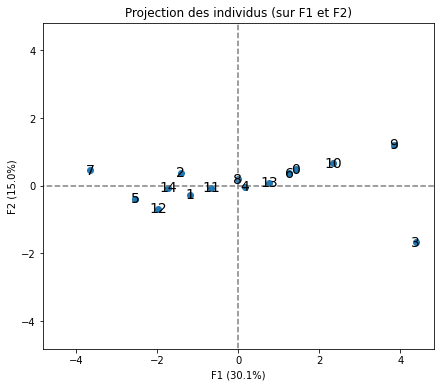

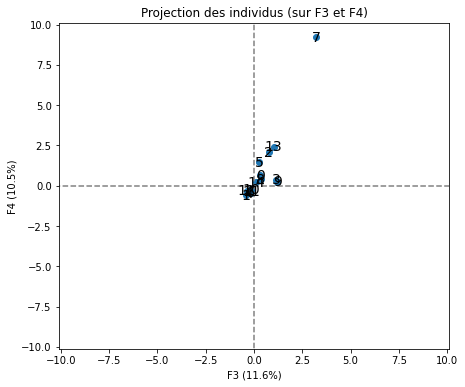

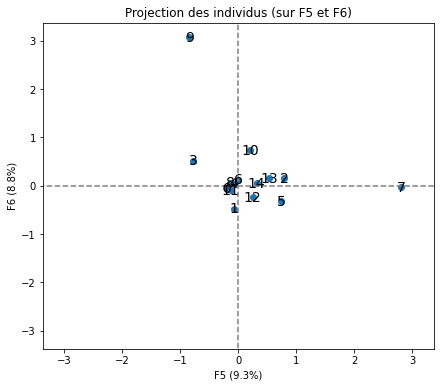

In [70]:
X_km_proj=pca.transform(X_km_scaled)
display_factorial_planes(X_km_proj,len(cumsum),pca, [(0,1),(2,3),(4,5)], labels = np.arange(15))

### $\rightarrow$ On va à présent voir les références nutritionnelles pour la population et notamment dans le cas d'une maladie

In [71]:
tdf0=pd.Series(np.zeros(100))
tdf1=pd.Series(np.ones(100))

In [72]:
(tdf0-1)*(tdf1/3)#test pour les calculs entre 

0    -0.333333
1    -0.333333
2    -0.333333
3    -0.333333
4    -0.333333
        ...   
95   -0.333333
96   -0.333333
97   -0.333333
98   -0.333333
99   -0.333333
Length: 100, dtype: float64

In [73]:
df_platprep_tot=pd.DataFrame((df_platprep[df_platprep.columns[:-5]]/100).apply(lambda x: x*df_platprep['quantité']).values,index=df_platprep.index,columns=['iron','sodium','proteins','fiber','calcium','lipide','glucide','nrj'])

In [74]:
0.000727*397.0/100

0.0028861900000000003

In [75]:
df_platprep_tot

,iron,sodium,proteins,fiber,calcium,lipide,glucide,nrj
239,0.002886,1.183060,32.0776,2.00485,0.400970,30.0926,84.164,3021.17
7298,0.000605,0.844488,3.9000,9.75000,0.185250,9.7500,19.500,838.50
9710,0.007777,1.650197,40.4000,10.60500,0.575700,34.8450,147.460,4570.25
11776,0.010850,2.362205,79.0000,20.00000,0.950000,84.0000,104.000,6380.00
14709,0.002104,0.340100,8.5975,3.00200,0.151525,6.8970,37.430,1064.00
...,...,...,...,...,...,...,...,...
189232,0.000000,5.416500,0.0000,0.00000,0.166500,8.3350,8.335,435.00
189663,0.003880,1.385827,24.0000,24.40000,0.084000,33.6000,26.000,544.00
189664,0.005880,1.149606,26.0000,20.80000,0.114000,17.2000,34.800,1836.00
189666,0.001064,1.271654,17.8600,5.32000,0.112100,5.3200,64.600,1687.20


In [76]:
df_platprep

,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g,nutrition_grade_fr,main_category_fr,ingrédients,code,quantité
239,0.000727,0.298000,8.08,0.505,0.1010,7.58,21.20,761.0,C,Plats préparés,"COOKED ELBOW MACARONI (WATER, ENRICHED SEMOLIN...",36559,397.0
7298,0.000155,0.216535,1.00,2.500,0.0475,2.50,5.00,215.0,A,Plats préparés,NaN,114356,390.0
9710,0.001540,0.326772,8.00,2.100,0.1140,6.90,29.20,905.0,B,Plats préparés,Farine de _blé_ contient _Gluten_ (avec Farin...,161862,505.0
11776,0.001085,0.236220,7.90,2.000,0.0950,8.40,10.40,638.0,B,Plats préparés,Bœuf (27%) - _Lait_ demi-écrémé - Tomates (19%...,201766,1000.0
14709,0.002215,0.358000,9.05,3.160,0.1595,7.26,39.40,1120.0,B,Plats préparés,"Wheatflour, Water, Vegetarian Mozzarella Chees...",226646,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189232,0.000000,10.833000,0.00,0.000,0.3330,16.67,16.67,870.0,E,Plats préparés,"Salt, Spices, Galangal, Lemongrass, Vegetable ...",8850030116019,50.0
189663,0.000970,0.346457,6.00,6.100,0.0210,8.40,6.50,136.0,A,Plats préparés,"Pâtes cuites 46% (eau, amidon de blé modifié, ...",9005545001650,400.0
189664,0.001470,0.287402,6.50,5.200,0.0285,4.30,8.70,459.0,A,Plats préparés,"Pâtes cuites 45% (eau, amidon de blé modifié, ...",9005545001674,400.0
189666,0.000280,0.334646,4.70,1.400,0.0295,1.40,17.00,444.0,B,Plats préparés,"34% Reis gekocht (Wasser, Reis), Wasser, 12% r...",9005545004200,380.0


In [77]:
((df_platprep['energy_100g']/100)*df_platprep['quantité']).describe()

count     1381.000000
mean      2356.272915
std       1513.842301
min        208.200000
25%       1423.500000
50%       1865.500000
75%       2895.000000
max      16767.000000
dtype: float64

1 kcal = 4,1868 kJ, on va passer en Kcal car plus parlant

In [78]:
df_platprep_tot['nrj']=df_platprep_tot['nrj']/4.1868

In [79]:
df_platprep_tot.describe()

,iron,sodium,proteins,fiber,calcium,lipide,glucide,nrj
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,0.004000,1.471452,23.634440,7.534626,0.276212,24.577922,58.401411,562.786117
std,0.004597,2.205195,19.323715,6.728930,0.271477,20.382600,49.248843,361.575022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.727716
25%,0.001770,0.826772,12.000000,3.400000,0.102000,12.000000,26.700000,339.997134
50%,0.002805,1.122047,19.600000,6.000000,0.204750,20.400000,45.500000,445.567020
75%,0.004704,1.752756,28.800000,9.720000,0.360000,30.940000,73.000000,691.458871
max,0.086391,71.120000,341.550000,91.200000,3.752000,294.300000,390.000000,4004.729149


<font color='red'> C'est assez étrange car quand je  regarde pour plusieurs aliments au hasard, on voit que la quantité energy_100g est parfois peu clair, entre kcal, kj mais également si c'est pour 100g ou la quantité total enfin bref on va continuer mais ça sera un truc à voir plus sérieusement

In [80]:
df_platprep_tot.corr()

,iron,sodium,proteins,fiber,calcium,lipide,glucide,nrj
iron,1.000000,0.196964,0.437494,0.395429,0.290325,0.271645,0.435585,0.475842
sodium,0.196964,1.000000,0.344889,0.187074,0.244283,0.306588,0.272110,0.383294
proteins,0.437494,0.344889,1.000000,0.296903,0.597613,0.613755,0.436915,0.766613
fiber,0.395429,0.187074,0.296903,1.000000,0.199713,0.202657,0.337035,0.367240
calcium,0.290325,0.244283,0.597613,0.199713,1.000000,0.505516,0.389800,0.612067
lipide,0.271645,0.306588,0.613755,0.202657,0.505516,1.000000,0.217706,0.733790
glucide,0.435585,0.272110,0.436915,0.337035,0.389800,0.217706,1.000000,0.762023
nrj,0.475842,0.383294,0.766613,0.367240,0.612067,0.733790,0.762023,1.000000


In [81]:
df_platprep.corr()

,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g,quantité
iron_100g,1.000000,0.056883,0.230297,0.269108,0.107038,0.048770,0.255698,0.279425,-0.071140
sodium_100g,0.056883,1.000000,0.082136,0.074600,0.061534,0.054723,0.221028,0.206262,-0.065666
proteins_100g,0.230297,0.082136,1.000000,0.178296,0.363771,0.274964,0.178932,0.524711,-0.193499
fiber_100g,0.269108,0.074600,0.178296,1.000000,-0.010152,-0.058907,0.197742,0.190692,-0.145872
calcium_100g,0.107038,0.061534,0.363771,-0.010152,1.000000,0.242394,0.151835,0.346147,-0.082417
fat_100g,0.048770,0.054723,0.274964,-0.058907,0.242394,1.000000,-0.068210,0.495317,-0.087260
carbohydrates_100g,0.255698,0.221028,0.178932,0.197742,0.151835,-0.068210,1.000000,0.723892,-0.135422
energy_100g,0.279425,0.206262,0.524711,0.190692,0.346147,0.495317,0.723892,1.000000,-0.199207
quantité,-0.071140,-0.065666,-0.193499,-0.145872,-0.082417,-0.087260,-0.135422,-0.199207,1.000000


In [82]:
df_platprep_tot.iron,df_platprep.iron_100g

(239       0.002886
 7298      0.000605
 9710      0.007777
 11776     0.010850
 14709     0.002104
             ...   
 189232    0.000000
 189663    0.003880
 189664    0.005880
 189666    0.001064
 190107    0.003841
 Name: iron, Length: 1381, dtype: float64,
 239       0.000727
 7298      0.000155
 9710      0.001540
 11776     0.001085
 14709     0.002215
             ...   
 189232    0.000000
 189663    0.000970
 189664    0.001470
 189666    0.000280
 190107    0.000835
 Name: iron_100g, Length: 1381, dtype: float64)

In [83]:
test=pd.DataFrame({'iron':df_platprep_tot.iron.values,'iron100g':df_platprep.iron_100g.values})
test.corr()

,iron,iron100g
iron,1.000000,0.827629
iron100g,0.827629,1.000000


array([[<AxesSubplot:xlabel='iron', ylabel='iron'>,
        <AxesSubplot:xlabel='iron100g', ylabel='iron'>],
       [<AxesSubplot:xlabel='iron', ylabel='iron100g'>,
        <AxesSubplot:xlabel='iron100g', ylabel='iron100g'>]], dtype=object)

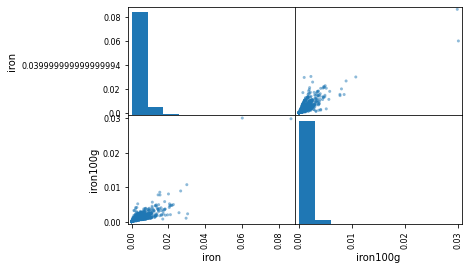

In [84]:
scatter_matrix(test)

array([[<AxesSubplot:xlabel='iron', ylabel='iron'>,
        <AxesSubplot:xlabel='sodium', ylabel='iron'>,
        <AxesSubplot:xlabel='proteins', ylabel='iron'>,
        <AxesSubplot:xlabel='fiber', ylabel='iron'>,
        <AxesSubplot:xlabel='calcium', ylabel='iron'>,
        <AxesSubplot:xlabel='lipide', ylabel='iron'>,
        <AxesSubplot:xlabel='glucide', ylabel='iron'>,
        <AxesSubplot:xlabel='nrj', ylabel='iron'>],
       [<AxesSubplot:xlabel='iron', ylabel='sodium'>,
        <AxesSubplot:xlabel='sodium', ylabel='sodium'>,
        <AxesSubplot:xlabel='proteins', ylabel='sodium'>,
        <AxesSubplot:xlabel='fiber', ylabel='sodium'>,
        <AxesSubplot:xlabel='calcium', ylabel='sodium'>,
        <AxesSubplot:xlabel='lipide', ylabel='sodium'>,
        <AxesSubplot:xlabel='glucide', ylabel='sodium'>,
        <AxesSubplot:xlabel='nrj', ylabel='sodium'>],
       [<AxesSubplot:xlabel='iron', ylabel='proteins'>,
        <AxesSubplot:xlabel='sodium', ylabel='proteins'>,
        

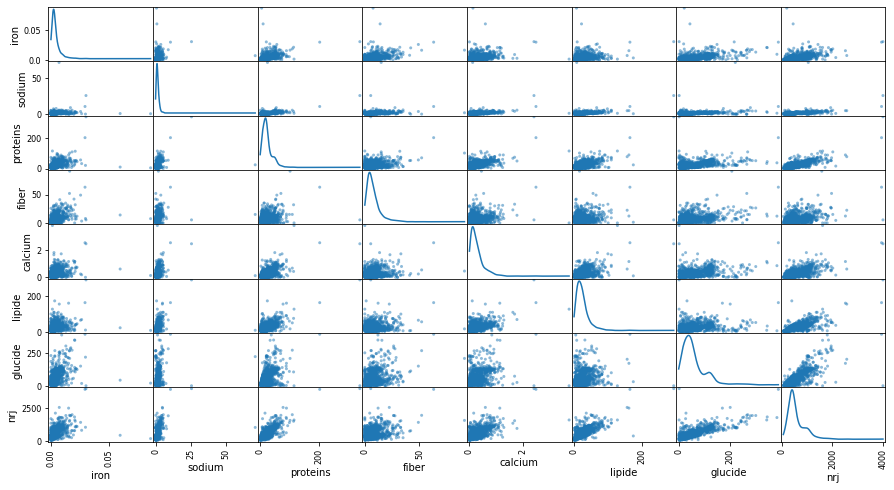

In [85]:
scatter_matrix(df_platprep_tot,figsize=(15,8),diagonal='kde',grid=True)


In [86]:
df_platprep_tot.corr()

,iron,sodium,proteins,fiber,calcium,lipide,glucide,nrj
iron,1.000000,0.196964,0.437494,0.395429,0.290325,0.271645,0.435585,0.475842
sodium,0.196964,1.000000,0.344889,0.187074,0.244283,0.306588,0.272110,0.383294
proteins,0.437494,0.344889,1.000000,0.296903,0.597613,0.613755,0.436915,0.766613
fiber,0.395429,0.187074,0.296903,1.000000,0.199713,0.202657,0.337035,0.367240
calcium,0.290325,0.244283,0.597613,0.199713,1.000000,0.505516,0.389800,0.612067
lipide,0.271645,0.306588,0.613755,0.202657,0.505516,1.000000,0.217706,0.733790
glucide,0.435585,0.272110,0.436915,0.337035,0.389800,0.217706,1.000000,0.762023
nrj,0.475842,0.383294,0.766613,0.367240,0.612067,0.733790,0.762023,1.000000


<AxesSubplot:>

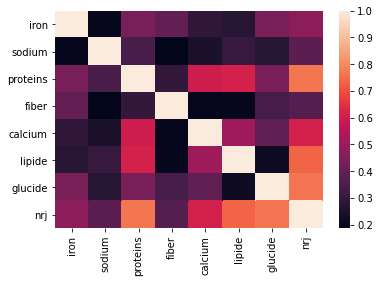

In [87]:
sns.heatmap(df_platprep_tot.corr())

<font color='gray'> On refait un pca aux vues des corrélations pour voir.

In [88]:
data_tot_pca=df_platprep_tot
Xtot=data_tot_pca.values
std_scaletot=preprocessing.StandardScaler().fit(Xtot)
Xtot_scaled=std_scaletot.transform(Xtot)
pcatot=decomposition.PCA()
pcatot.fit(Xtot_scaled)
cumsum_tot=np.cumsum(pcatot.explained_variance_ratio_)

,iron,sodium,proteins,fiber,calcium,lipide,glucide,nrj
239,0.002886,1.183060,32.0776,2.00485,0.400970,30.0926,84.164,721.594058
7298,0.000605,0.844488,3.9000,9.75000,0.185250,9.7500,19.500,200.272284
9710,0.007777,1.650197,40.4000,10.60500,0.575700,34.8450,147.460,1091.585459
11776,0.010850,2.362205,79.0000,20.00000,0.950000,84.0000,104.000,1523.836820
14709,0.002104,0.340100,8.5975,3.00200,0.151525,6.8970,37.430,254.132034
...,...,...,...,...,...,...,...,...
189232,0.000000,5.416500,0.0000,0.00000,0.166500,8.3350,8.335,103.897965
189663,0.003880,1.385827,24.0000,24.40000,0.084000,33.6000,26.000,129.932168
189664,0.005880,1.149606,26.0000,20.80000,0.114000,17.2000,34.800,438.521066
189666,0.001064,1.271654,17.8600,5.32000,0.112100,5.3200,64.600,402.980797


In [ ]:
X_km_proj=pca.transform(X_km_scaled)
display_factorial_planes(X_km_proj,len(cumsum),pca, [(0,1),(2,3),(4,5)], labels = np.arange(15))

<BarContainer object of 8 artists>

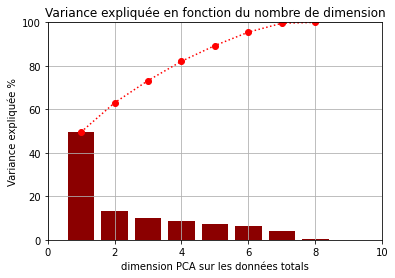

In [89]:
plt.plot(np.arange(1,len(cumsum_tot)+1),cumsum_tot*100,'o:',color='red')
plt.xlim(0,10)
plt.ylim(0,100)
plt.grid()
plt.xlabel('dimension PCA sur les données totals')
plt.ylabel('Variance expliquée %')
plt.title('Variance expliquée en fonction du nombre de dimension')
plt.bar(np.arange(1,len(cumsum_tot)+1),pcatot.explained_variance_ratio_*100,color='darkred')

In [183]:
tstpca=decomposition.PCA(n_components=2)
tstpca.fit(X_scaled)
cumsum_tst=np.cumsum(tstpca.explained_variance_ratio_)

In [184]:
X_scaled.shape

(1381, 9)

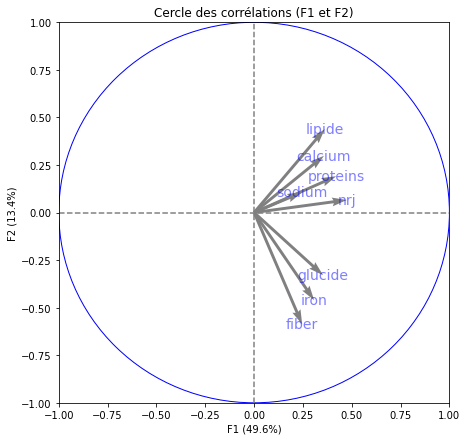

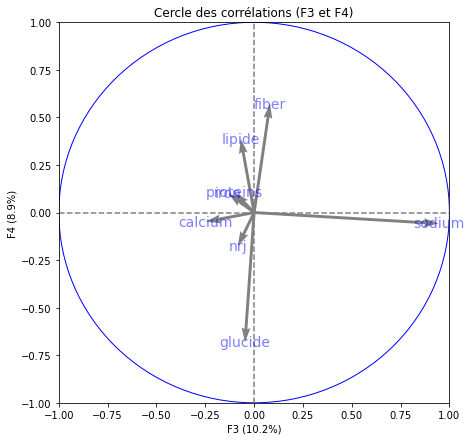

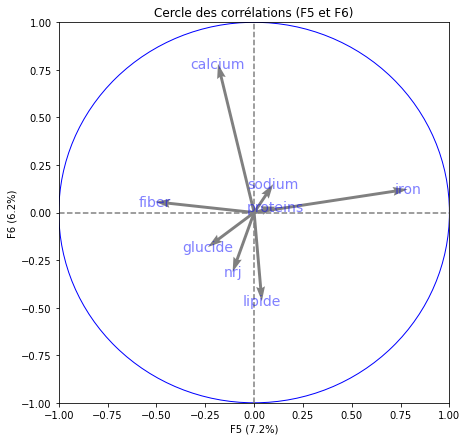

In [91]:
display_circles(pcatot.components_,len(cumsum_tot),pcatot,[(0,1),(2,3),(4,5)], labels = df_platprep_tot.columns)

In [185]:
xtestproj=tstpca.transform(X_km_scaled)

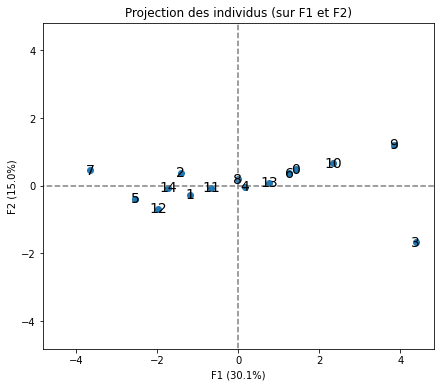

Objectif terminer par faire un kmeans dans les valeurs totals afin de voir la fin

In [92]:
dict_val_nutripourcent={'protein':4,'lipide':4,'glucide':9} #voilà
dict_val_nutrigrammes={'fiber':30,'calcium':0.9,'iron':0.009,'sodium':2.4} 

In [93]:
df_pourcentage=pd.DataFrame((df_platprep_tot[['proteins','lipide']]*(4/25)).values,index=df_platprep_tot.index,columns=['protein','lipide'])

In [94]:
df_platprep_tot.describe()

,iron,sodium,proteins,fiber,calcium,lipide,glucide,nrj
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,0.004000,1.471452,23.634440,7.534626,0.276212,24.577922,58.401411,562.786117
std,0.004597,2.205195,19.323715,6.728930,0.271477,20.382600,49.248843,361.575022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.727716
25%,0.001770,0.826772,12.000000,3.400000,0.102000,12.000000,26.700000,339.997134
50%,0.002805,1.122047,19.600000,6.000000,0.204750,20.400000,45.500000,445.567020
75%,0.004704,1.752756,28.800000,9.720000,0.360000,30.940000,73.000000,691.458871
max,0.086391,71.120000,341.550000,91.200000,3.752000,294.300000,390.000000,4004.729149


In [95]:
df_pourcentage['glucide']=df_platprep_tot['glucide']*(9/25)

In [96]:
df_platprep_tot['glucide']

239        84.164
7298       19.500
9710      147.460
11776     104.000
14709      37.430
           ...   
189232      8.335
189663     26.000
189664     34.800
189666     64.600
190107    139.380
Name: glucide, Length: 1381, dtype: float64

In [97]:
df_pourcentage

,protein,lipide,glucide
239,5.132416,4.814816,30.29904
7298,0.624000,1.560000,7.02000
9710,6.464000,5.575200,53.08560
11776,12.640000,13.440000,37.44000
14709,1.375600,1.103520,13.47480
...,...,...,...
189232,0.000000,1.333600,3.00060
189663,3.840000,5.376000,9.36000
189664,4.160000,2.752000,12.52800
189666,2.857600,0.851200,23.25600


In [98]:
for k,j in zip(dict_val_nutrigrammes.values(),dict_val_nutrigrammes):
    df_pourcentage[j]=(df_platprep_tot[j]/k)*100

In [99]:
df_pourcentage

,protein,lipide,glucide,fiber,calcium,iron,sodium
239,5.132416,4.814816,30.29904,6.682833,44.552222,32.068778,49.294167
7298,0.624000,1.560000,7.02000,32.500000,20.583333,6.716667,35.187008
9710,6.464000,5.575200,53.08560,35.350000,63.966667,86.411111,68.758202
11776,12.640000,13.440000,37.44000,66.666667,105.555556,120.555556,98.425197
14709,1.375600,1.103520,13.47480,10.006667,16.836111,23.380556,14.170833
...,...,...,...,...,...,...,...
189232,0.000000,1.333600,3.00060,0.000000,18.500000,0.000000,225.687500
189663,3.840000,5.376000,9.36000,81.333333,9.333333,43.111111,57.742782
189664,4.160000,2.752000,12.52800,69.333333,12.666667,65.333333,47.900262
189666,2.857600,0.851200,23.25600,17.733333,12.455556,11.822222,52.985564


In [100]:
lim1repas35prcent={'protein':7,'lipide':12.25,'glucide':15.75,'fiber':10.5,'calcium':35,'iron':35,'sodium':35}

In [101]:
df_regime=pd.DataFrame(index=df_platprep_tot.index)

Pour le cas d'un régime d'un patient ayant subit une greffe de poumon par exemple, on sait qu'il doit y avoir une faible teneur en sodium et en gras (lipide) mais beaucoup en fibre. On va donc voir sachant qu'il y a moins de 5% de la valeur quotidienne en lipide, de même en sel soit moins de 0.12 grammes de sodium 

In [102]:
for k,j in zip(lim1repas35prcent.values(),lim1repas35prcent):
    if j=='fiber':
        df_regime['fiber']=df_pourcentage['fiber']
    else: df_regime[j]=df_pourcentage[j]<k

In [103]:
def cal_bool(s):
    m=True
    for k in s:
        m=m&k
    return m

In [104]:
ser=df_platprep[df_regime[['protein','lipide','glucide','calcium','iron','sodium']].apply(cal_bool,axis=1)]

In [105]:
def bool_to_str(x):
    if x:
        return 'ok pour régime'
    else: return 'non ok pour régime'

In [106]:
ser_=df_regime[['protein','lipide','glucide','calcium','iron','sodium']].apply(cal_bool,axis=1).apply(bool_to_str)

In [107]:
lab_=ser.nutrition_grade_fr.value_counts().index+np.array([': ',': ',': ',': '])+ser.nutrition_grade_fr.value_counts().astype(str).values 
lab_

Index(['A: 62', 'B: 56', 'C: 44', 'D: 3'], dtype='object')

Text(0, 0.5, '')

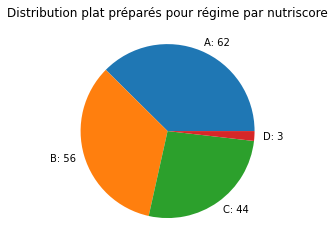

In [108]:
plt.figure(facecolor='white')
ser.nutrition_grade_fr.value_counts().plot.pie(labels=lab_)
plt.title('Distribution plat préparés pour régime par nutriscore')
plt.ylabel('')

On s'intéresse maintenant à la distribution des fibres par nutriscore des plats préparés. En-tire ton des corrélations et une tendance par rapport au niveau de fibre: et let's goooo 

In [109]:
ser.index

Int64Index([ 14709, 131530, 132019, 132020, 133386, 133387, 133441, 135401,
            135997, 136087,
            ...
            183682, 183684, 183686, 185673, 186115, 186352, 187034, 188509,
            188830, 188832],
           dtype='int64', length=165)

In [110]:
df_fiber_cat=pd.DataFrame(df_pourcentage.loc[ser.index,'fiber'])

In [111]:
df_fiber_cat_=pd.DataFrame(df_pourcentage['fiber'])

In [112]:
df_fiber_cat_['nutriscore']=df_platprep['nutrition_grade_fr']
df_fiber_cat_['régime']=ser_

In [113]:
df_fiber_cat['nutriscore']=df_platprep.loc[ser.index,'nutrition_grade_fr']

In [114]:
df_fiber_cat.isna().sum()

fiber         0
nutriscore    0
dtype: int64

In [115]:
df_fiber_cat.nutriscore.unique()

array(['B', 'C', 'A', 'D'], dtype=object)

In [116]:
group=[]
for k in df_fiber_cat.nutriscore.unique():
    group.append(df_fiber_cat[df_fiber_cat['nutriscore']==k]['fiber'])
    
group

[14709     10.006667
 131530     6.673333
 135401    10.000000
 136087     0.000000
 138582    15.000000
 138680    19.000000
 140720    15.466667
 140770    10.666667
 142577    14.733333
 142851    11.500000
 143332    15.833333
 143578    11.666667
 144514     7.000000
 144573     2.250000
 147433    19.600000
 149531     4.000000
 149654    25.000000
 150303    10.000000
 150782    15.600000
 150794    25.000000
 150945    14.000000
 152142     8.000000
 152770    16.133333
 153125     9.900000
 153214    14.000000
 153742    10.400000
 154573     4.666667
 154578     5.600000
 154597     9.333333
 154600    14.933333
 154607    11.200000
 154610    11.200000
 154647    13.066667
 155698    13.333333
 156350    15.500000
 159030     8.100000
 159034     4.800000
 159035     4.500000
 159784     9.000000
 159787     5.316667
 160509    16.000000
 160666    20.666667
 160970     5.800000
 162614    16.000000
 164445     4.833333
 166573    10.000000
 167085     1.633333
 167717    18

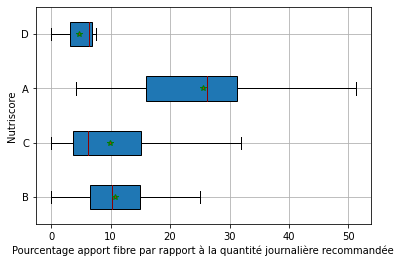

In [117]:
medianprops = {'color':"darkred"}
meanprops = {'marker':'*', 'markeredgecolor':'green',
            'markerfacecolor':'firebrick'}
plt.grid()
plt.boxplot(group, labels=df_fiber_cat.nutriscore.unique(), showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel('Nutriscore')
plt.title('')
plt.xlabel('Pourcentage apport fibre par rapport à la quantité journalière recommandée')
plt.show()

Text(0.5, 1.0, 'Boxplot du % valeur quotidienne de fibre et le nutriscore par plat préparé')

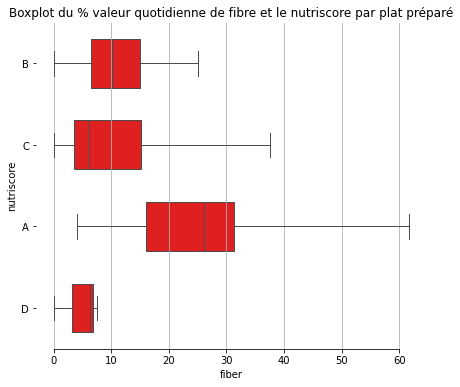

In [118]:
f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x='fiber',y='nutriscore',data=df_fiber_cat,whis=[0, 100], width=.6, color='red',linewidth=1)
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
ax.set_title('Boxplot du % valeur quotidienne de fibre et le nutriscore par plat préparé')

Text(0.5, 1.0, 'Boxplot du % valeur quotidienne de fibre et le nutriscore par plat préparé')

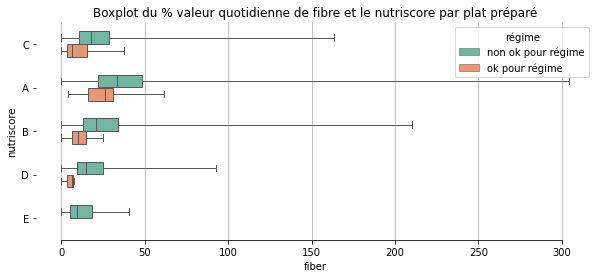

In [119]:
f, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(x='fiber',y='nutriscore',hue='régime',data=df_fiber_cat_,whis=[0, 100], width=.6,palette="Set2",linewidth=1)
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
ax.set_title('Boxplot du % valeur quotidienne de fibre et le nutriscore par plat préparé')

In [120]:
X = "nutriscore" 
Y = "fiber"


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT #ssbetween/sstotal
    
eta_squared(df_fiber_cat[X],df_fiber_cat[Y])

0.36791114921483103

Le résultat est de 0.38 donc il existe une corrélation entre le pourcentage de fibre dans le plat préparé et le nutriscore qui lui est associé.

In [121]:
k = len(pd.unique(df_fiber_cat.nutriscore))
N = len(df_fiber_cat.values)
n = df_fiber_cat.groupby('nutriscore').size()[0]
print(k,n,N)

4 62 165


In [122]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('fiber ~ nutriscore',
                data=df_fiber_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq     df          F        PR(>F)
nutriscore   9094.492135    3.0  31.237009  5.719875e-16
Residual    15624.769987  161.0        NaN           NaN


## $\Rightarrow$ <ins> Partie X</ins>:  Analyse des corrélations


In [ ]:
scatter_matrix(dfknn[dfknn.columns[:8]],figsize=(15,8),diagonal='kde',grid=True)


In [ ]:
dfknn[dfknn.columns[:8]].corr()

# $\rhd$ <ins> BROUILLON </ins>  $\lhd$
